In [2]:

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Path to your image
img_path = r'..\image.jpg'

# Read the image (unchanged so it preserves channels)
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
if img is None:
    raise FileNotFoundError(f"Cannot load image at {img_path}")


In [3]:
# --- info ---
h, w = img.shape[:2]
channels = 1 if img.ndim == 2 else img.shape[2]
dtype = img.dtype
orig_size = os.path.getsize(img_path) / 1024
print(f"Original image: {w}×{h}, channels={channels}, dtype={dtype}, size={orig_size:.2f} KB")

# --- compress & ratio ---
out_path = 'image_compressed.jpg'
# 85% JPEG quality
cv2.imwrite(out_path, img, [cv2.IMWRITE_JPEG_QUALITY, 85])
comp_size = os.path.getsize(out_path) / 1024
ratio = orig_size / comp_size if comp_size else float('inf')
print(f"Compressed copy: {out_path}")
print(f" - size={comp_size:.2f} KB")
print(f" - compression ratio (orig/comp) = {ratio:.2f}")


Original image: 1984×1116, channels=3, dtype=uint8, size=167.52 KB
Compressed copy: image_compressed.jpg
 - size=224.29 KB
 - compression ratio (orig/comp) = 0.75


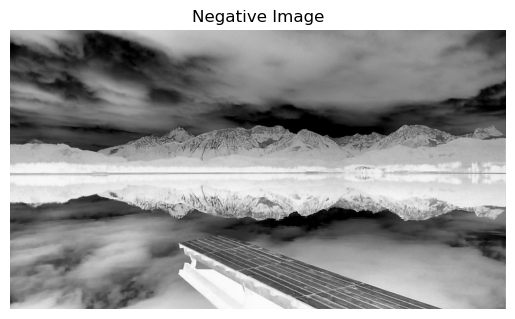

In [4]:

# Compute negative: for uint8 images simply 255 - pixel
neg = 255 - img if img.dtype == np.uint8 else img.max() - img

# Convert BGR to RGB for display if color
if neg.ndim == 3:
    neg = cv2.cvtColor(neg, cv2.COLOR_BGR2RGB)
    plt.imshow(neg)
else:
    plt.imshow(neg, cmap='gray')

plt.title("Negative Image")
plt.axis('off')
plt.show()
